In [145]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [146]:
df = pd.read_csv('/Users/akashtiwari/Documents/Projects/ML/laptop.csv')

In [147]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [148]:
df.shape

(1303, 13)

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0.1      1303 non-null   int64  
 1   Unnamed: 0        1273 non-null   float64
 2   Company           1273 non-null   object 
 3   TypeName          1273 non-null   object 
 4   Inches            1273 non-null   object 
 5   ScreenResolution  1273 non-null   object 
 6   Cpu               1273 non-null   object 
 7   Ram               1273 non-null   object 
 8   Memory            1273 non-null   object 
 9   Gpu               1273 non-null   object 
 10  OpSys             1273 non-null   object 
 11  Weight            1273 non-null   object 
 12  Price             1273 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [150]:
df.duplicated().sum()

0

In [151]:
df.isnull().sum()

Unnamed: 0.1         0
Unnamed: 0          30
Company             30
TypeName            30
Inches              30
ScreenResolution    30
Cpu                 30
Ram                 30
Memory              30
Gpu                 30
OpSys               30
Weight              30
Price               30
dtype: int64

In [152]:
df.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'], inplace=True, errors='ignore') # dropping the columns

In [153]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [154]:
df['Ram'] = df['Ram'].str.replace('GB','')
df['Weight'] = df['Weight'].str.replace('kg','')

In [155]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [156]:
df['Ram'] = df['Ram'].fillna(0).astype('int32')


# Replace non-numeric values (e.g., '?') with NaN
df['Weight'] = pd.to_numeric(df['Weight'], errors='coerce')

# Convert 'Weight' column to float
df['Weight'] = df['Weight'].astype('float32')


In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1273 non-null   object 
 1   TypeName          1273 non-null   object 
 2   Inches            1273 non-null   object 
 3   ScreenResolution  1273 non-null   object 
 4   Cpu               1273 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1273 non-null   object 
 7   Gpu               1273 non-null   object 
 8   OpSys             1273 non-null   object 
 9   Weight            1272 non-null   float32
 10  Price             1273 non-null   float64
dtypes: float32(1), float64(1), int32(1), object(8)
memory usage: 101.9+ KB


In [158]:
import seaborn as sns

/Users/akashtiwari/Documents/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


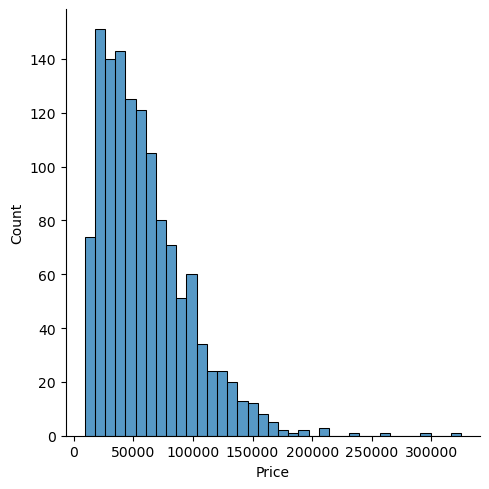

In [159]:
sns.displot(df['Price'])

<Axes: xlabel='Company'>

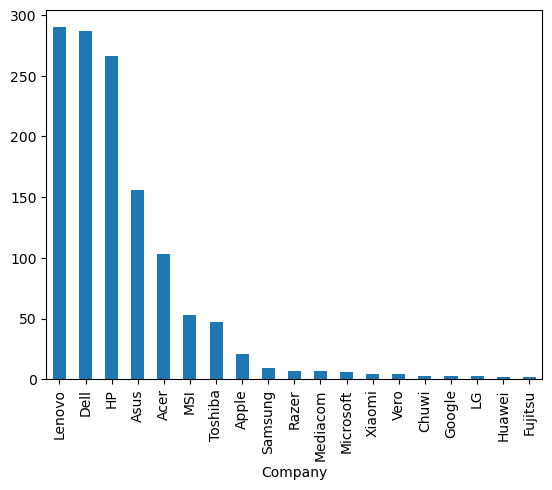

In [160]:
df['Company'].value_counts().plot(kind='bar')

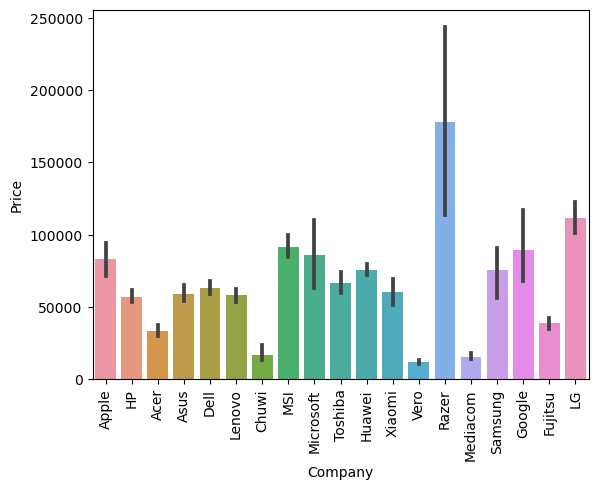

In [161]:
sns.barplot(x=df['Company'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='TypeName'>

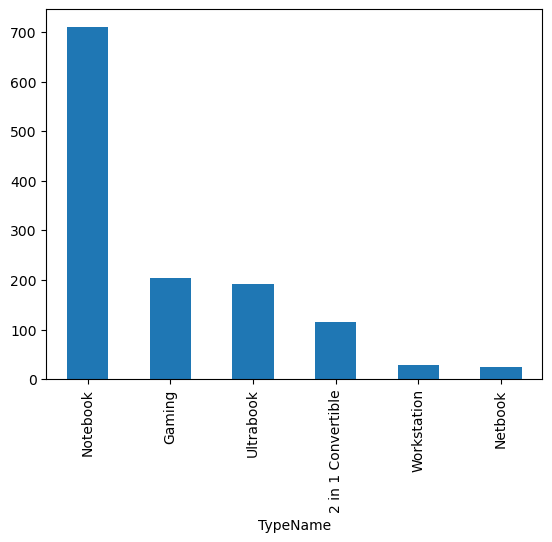

In [162]:
df['TypeName'].value_counts().plot(kind='bar')

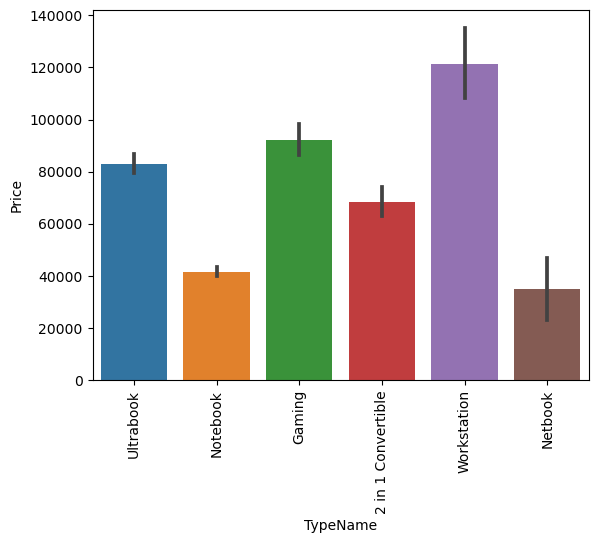

In [163]:
sns.barplot(x=df['TypeName'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

/Users/akashtiwari/Documents/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


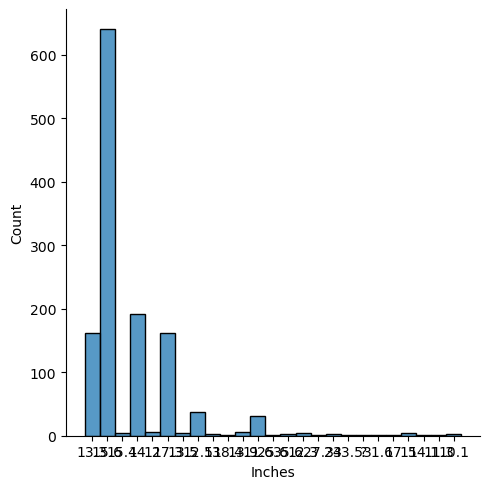

In [164]:
sns.displot(df['Inches'])

<Axes: xlabel='Inches', ylabel='Price'>

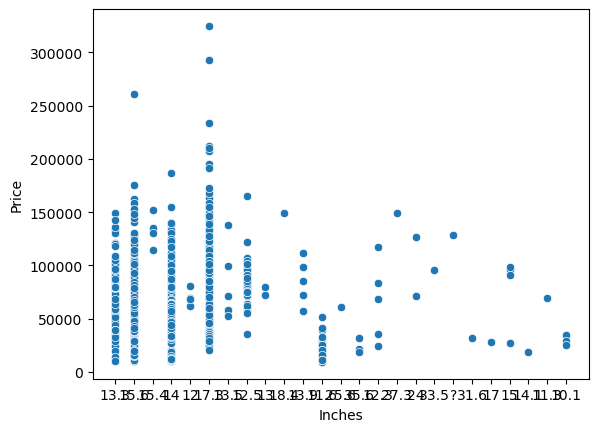

In [165]:
sns.scatterplot(x=df['Inches'],y=df['Price'])

In [166]:
df['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                495
1366x768                                         274
IPS Panel Full HD 1920x1080                      226
IPS Panel Full HD / Touchscreen 1920x1080         52
Full HD / Touchscreen 1920x1080                   45
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  14
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160                9
4K Ultra HD 3840x2160                              7
IPS Panel 1366x768                                 7
IPS Panel Retina Display 2560x1600                 6
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
Touchscreen 2560x1440                              6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x14

In [167]:
# Convert float values to strings and handle NaN values
df['ScreenResolution'] = df['ScreenResolution'].astype(str)

# Apply lambda function to create 'Touchscreen' column
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x: 1 if 'Touchscreen' in x else 0)


In [168]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
1113,HP,Ultrabook,13.3,Full HD 1920x1080,Intel Core i7 6500U 2.5GHz,8,512GB SSD,Intel HD Graphics 520,Windows 10,1.16,104908.32,0
864,Dell,Ultrabook,13.3,Quad HD+ / Touchscreen 3200x1800,Intel Core i7 7660U 2.5GHz,16,512GB SSD,Intel Iris Plus Graphics 640,Windows 10,1.29,119347.20,1
888,Acer,Netbook,11.6,IPS Panel 1366x768,Intel Celeron Dual Core N3060 1.6GHz,4,32GB Flash Storage,Intel HD Graphics 400,Chrome OS,1.25,15824.16,0
1061,Asus,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,16,1TB HDD,Nvidia GeForce GTX 965M,No OS,4.00,53173.44,0
982,Lenovo,Notebook,15.6,Full HD 1920x1080,AMD A12-Series 9720P 3.6GHz,6,256GB SSD,AMD Radeon 530,Windows 10,2.20,29250.72,0


<Axes: xlabel='Touchscreen'>

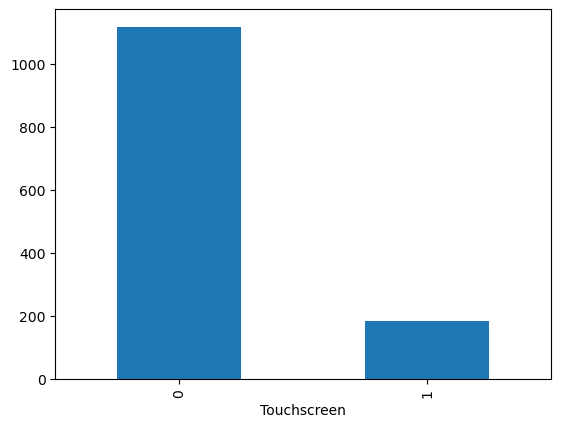

In [169]:
df['Touchscreen'].value_counts().plot(kind='bar')

<Axes: xlabel='Touchscreen', ylabel='Price'>

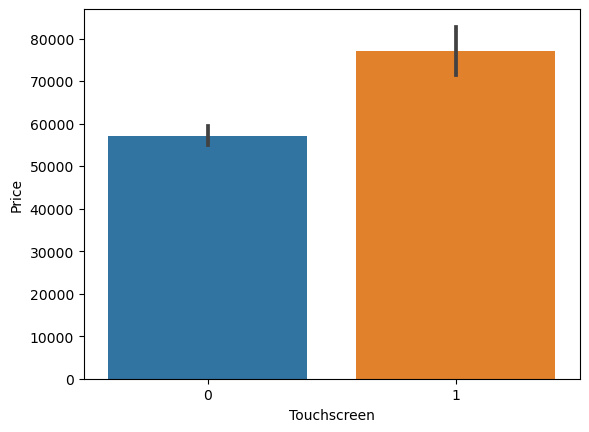

In [170]:
sns.barplot(x=df['Touchscreen'],y=df['Price'])

In [171]:
df['Ips'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

In [172]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1


<Axes: xlabel='Ips'>

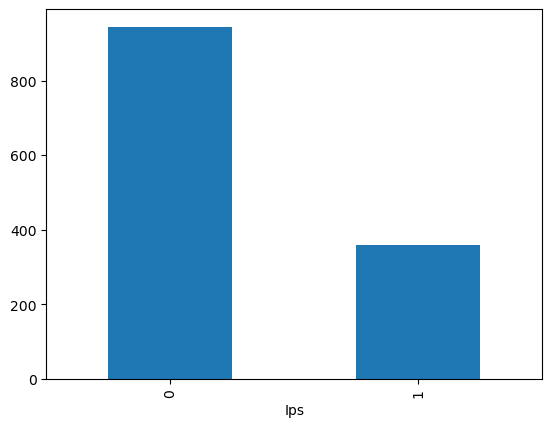

In [173]:
df['Ips'].value_counts().plot(kind='bar')

<Axes: xlabel='Ips', ylabel='Price'>

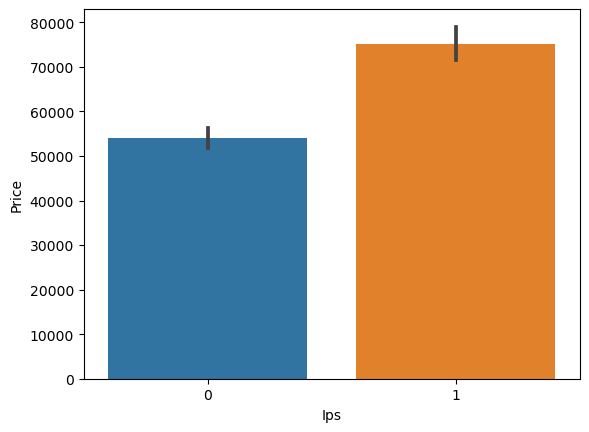

In [174]:
sns.barplot(x=df['Ips'],y=df['Price'])

In [175]:
new = df['ScreenResolution'].str.split('x',n=1,expand=True)

In [176]:
df['X_res'] = new[0]
df['Y_res'] = new[1]

In [177]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res
287,Asus,Ultrabook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Nvidia GeForce 940MX,Windows 10,1.70,52054.56,0,0,Full HD 1920,1080
395,HP,Ultrabook,15.6,Full HD 1920x1080,AMD A9-Series 9420 3GHz,4,256GB SSD,AMD Radeon 520,Windows 10,1.91,26586.72,0,0,Full HD 1920,1080
345,Lenovo,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 2TB HDD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.40,60153.12,0,1,IPS Panel Full HD 1920,1080
717,Lenovo,Notebook,15.6,1366x768,AMD A6-Series 7310 2GHz,4,500GB HDD,AMD Radeon R4,Windows 10,2.19,15877.44,0,0,1366,768
684,Lenovo,2 in 1 Convertible,13.3,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 8550U 1.8GHz,8,512GB SSD,Intel UHD Graphics 620,Windows 10,1.19,79866.72,1,1,IPS Panel Full HD / Touchscreen 1920,1080


In [178]:
# Replace ',' and extract numerical values using regular expressions
df['X_res'] = df['X_res'].str.replace(',', '').str.findall(r'(\d+\.?\d+)')

# Define a function to extract the first element of the list if it exists, otherwise return NaN
def extract_first_element(x):
    if len(x) > 0:
        return x[0]
    else:
        return np.nan

# Apply the function to handle the IndexError
df['X_res'] = df['X_res'].apply(extract_first_element)

In [179]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


In [180]:
# Fill NaN values with a default value (e.g., 0)
df['X_res'] = df['X_res'].fillna(0)
df['Y_res'] = df['Y_res'].fillna(0)

# Convert the columns to integers
df['X_res'] = df['X_res'].astype('int')
df['Y_res'] = df['Y_res'].astype('int')


In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1273 non-null   object 
 1   TypeName          1273 non-null   object 
 2   Inches            1273 non-null   object 
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1273 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1273 non-null   object 
 7   Gpu               1273 non-null   object 
 8   OpSys             1273 non-null   object 
 9   Weight            1272 non-null   float32
 10  Price             1273 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  Ips               1303 non-null   int64  
 13  X_res             1303 non-null   int64  
 14  Y_res             1303 non-null   int64  
dtypes: float32(1), float64(1), int32(1), int64(4), object(8)
memory usage: 142.6+ KB


In [182]:
# Exclude non-numeric columns from correlation calculation
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
corr_matrix = df[numeric_columns].corr()

# Get correlation of 'Price' with other columns
price_corr = corr_matrix['Price']


In [183]:
df['ppi'] = (((df['X_res']**2) + (df['Y_res']**2))**0.5).astype('float')

In [184]:
# Convert the string column to a numeric type
df['Inches'] = pd.to_numeric(df['Inches'], errors='coerce')

# Perform division operation after ensuring numeric compatibility
result = df['ppi'] / df['Inches']


In [185]:
# Convert the 'Price' column to numeric, coercing errors to NaN
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

# Remove rows with NaN values in the 'Price' column
df.dropna(subset=['Price'], inplace=True)

# Calculate the correlation matrix for numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
corr_matrix = df[numeric_columns].corr()

# Get the correlation of 'Price' with other numeric columns
price_corr = corr_matrix['Price']


In [186]:
df.drop(columns=['ScreenResolution'],inplace=True)

In [187]:
df.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res,ppi
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,3018.873962
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,1698.116604
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,2202.907170
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,3396.233208
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,3018.873962


In [188]:
df.drop(columns=['Inches','X_res','Y_res'],inplace=True)

In [189]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,3018.873962
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1698.116604
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,2202.907170
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,3396.233208
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,3018.873962


In [190]:
df['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz     183
Intel Core i7 7700HQ 2.8GHz    142
Intel Core i7 7500U 2.7GHz     128
Intel Core i7 8550U 1.8GHz      72
Intel Core i5 8250U 1.6GHz      68
                              ... 
AMD A9-Series 9420 2.9GHz        1
Intel Core i7 2.2GHz             1
AMD A6-Series 7310 2GHz          1
Intel Atom Z8350 1.92GHz         1
AMD E-Series 9000e 1.5GHz        1
Name: count, Length: 118, dtype: int64

In [191]:
df['Cpu Name'] = df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [192]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,3018.873962,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1698.116604,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,2202.907170,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,3396.233208,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,3018.873962,Intel Core i5


In [193]:
def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [194]:
df['Cpu brand'] = df['Cpu Name'].apply(fetch_processor)

In [195]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Name,Cpu brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,3018.873962,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1698.116604,Intel Core i5,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,2202.907170,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,3396.233208,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,3018.873962,Intel Core i5,Intel Core i5


<Axes: xlabel='Cpu brand'>

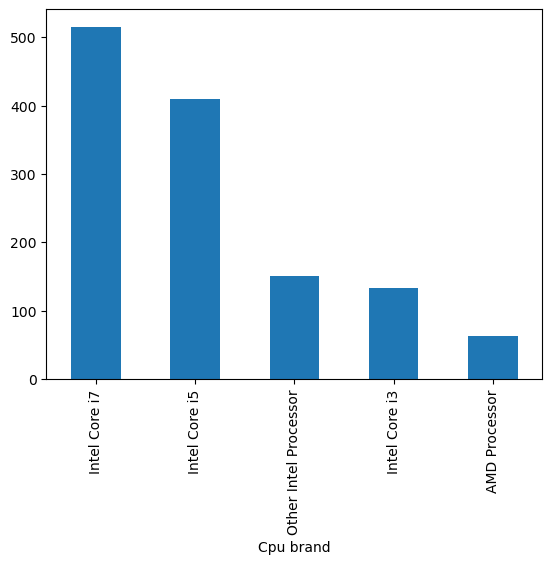

In [196]:
df['Cpu brand'].value_counts().plot(kind='bar')

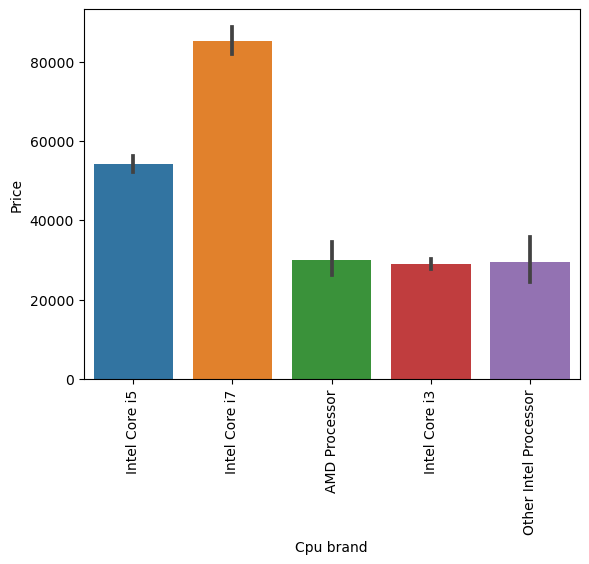

In [197]:
sns.barplot(x=df['Cpu brand'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [198]:
df.drop(columns=['Cpu','Cpu Name'],inplace=True)

In [199]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,3018.873962,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1698.116604,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,2202.907170,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,3396.233208,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,3018.873962,Intel Core i5


<Axes: xlabel='Ram'>

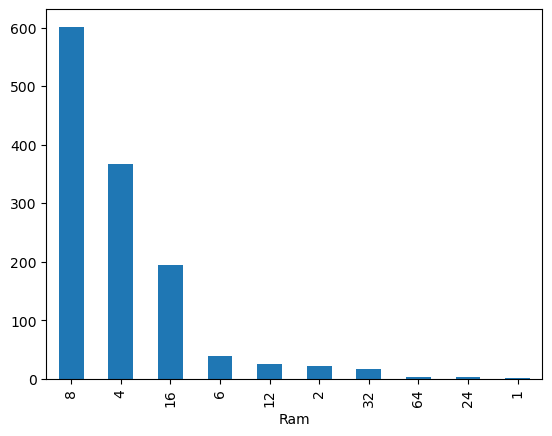

In [200]:
df['Ram'].value_counts().plot(kind='bar')

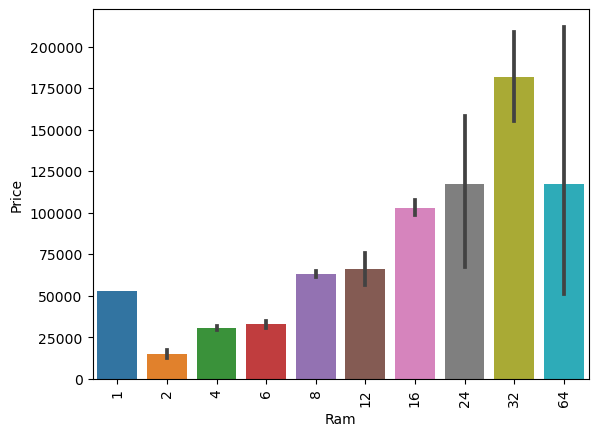

In [201]:
sns.barplot(x=df['Ram'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [202]:
df['Memory'].value_counts()

Memory
256GB SSD                        401
1TB HDD                          217
500GB HDD                        130
512GB SSD                        116
128GB SSD +  1TB HDD              92
128GB SSD                         74
256GB SSD +  1TB HDD              71
32GB Flash Storage                37
2TB HDD                           16
64GB Flash Storage                14
512GB SSD +  1TB HDD              14
1TB SSD                           13
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          4
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
128GB SSD +  2TB HDD               2
256GB SSD +  500GB HDD             2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD         

In [203]:
# Convert 'Memory' column to string type and remove decimal points
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)

# Remove 'GB' and replace 'TB' with '000' in 'Memory' column
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')

# Split 'Memory' column into two columns: 'first' and 'second'
new = df["Memory"].str.split("+", n=1, expand=True)
df["first"] = new[0].str.strip()
df["second"] = new[1]

# Extract information about storage types (HDD, SSD, Hybrid, Flash Storage)
df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

# Remove non-numeric characters from 'first' column
df['first'] = df['first'].str.replace(r'\D', '')

# Fill missing values in 'second' column with '0'
df["second"].fillna("0", inplace=True)

# Extract information about storage types (HDD, SSD, Hybrid, Flash Storage) from 'second' column
df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

# Remove non-numeric characters from 'second' column
df['second'] = df['second'].str.replace(r'\D', '')

# Convert 'first' and 'second' columns to integer type
df["first"] = pd.to_numeric(df["first"], errors='coerce').fillna(0).astype(int)
df["second"] = pd.to_numeric(df["second"], errors='coerce').fillna(0).astype(int)

# Calculate storage capacity for each type (HDD, SSD, Hybrid, Flash Storage)
df["HDD"] = (df["first"] * df["Layer1HDD"] + df["second"] * df["Layer2HDD"])
df["SSD"] = (df["first"] * df["Layer1SSD"] + df["second"] * df["Layer2SSD"])
df["Hybrid"] = (df["first"] * df["Layer1Hybrid"] + df["second"] * df["Layer2Hybrid"])
df["Flash_Storage"] = (df["first"] * df["Layer1Flash_Storage"] + df["second"] * df["Layer2Flash_Storage"])

# Drop unnecessary columns
df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
                 'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
                 'Layer2Flash_Storage'], inplace=True)


In [204]:
df.sample(5)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Hybrid,Flash_Storage
802,Dell,Ultrabook,8,256 SSD,Intel HD Graphics 620,Windows 10,1.29,79866.72,0,0,2202.90717,Intel Core i5,0,0,0,0
719,HP,Notebook,8,256 SSD,Nvidia GeForce 930MX,Windows 10,2.63,63936.00,0,0,2202.90717,Intel Core i7,0,0,0,0
924,Lenovo,2 in 1 Convertible,8,512 SSD,Intel HD Graphics 620,Windows 10,1.37,97236.00,1,1,2202.90717,Intel Core i5,0,0,0,0
1243,Dell,2 in 1 Convertible,16,512 SSD,Nvidia GeForce 940MX,Windows 10,2.77,95850.72,1,0,2202.90717,Intel Core i7,0,0,0,0
572,HP,Notebook,6,256 SSD,AMD Radeon 530,Windows 10,1.95,34578.72,0,1,2202.90717,AMD Processor,0,0,0,0


In [205]:
df.drop(columns=['Memory'],inplace=True)

In [206]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,3018.873962,Intel Core i5,0,0,0,0
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1698.116604,Intel Core i5,0,0,0,0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,2202.907170,Intel Core i5,0,0,0,0
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,3396.233208,Intel Core i7,0,0,0,0
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,3018.873962,Intel Core i5,0,0,0,0


In [207]:
# Convert the 'Price' column to numeric, coercing errors to NaN
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

# Remove rows with NaN values in the 'Price' column
df.dropna(subset=['Price'], inplace=True)

# Calculate the correlation matrix for numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
corr_matrix = df[numeric_columns].corr()

# Get the correlation of 'Price' with other numeric columns
price_corr = corr_matrix['Price']


In [208]:
df.drop(columns=['Hybrid','Flash_Storage'],inplace=True)

In [209]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,3018.873962,Intel Core i5,0,0
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1698.116604,Intel Core i5,0,0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,2202.907170,Intel Core i5,0,0
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,3396.233208,Intel Core i7,0,0
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,3018.873962,Intel Core i5,0,0


In [210]:
df['Gpu'].value_counts()

Gpu
Intel HD Graphics 620      271
Intel HD Graphics 520      181
Intel UHD Graphics 620      66
Nvidia GeForce GTX 1050     64
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

In [211]:
df['Gpu brand'] = df['Gpu'].apply(lambda x:x.split()[0])

In [212]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,3018.873962,Intel Core i5,0,0,Intel
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1698.116604,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,2202.907170,Intel Core i5,0,0,Intel
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,3396.233208,Intel Core i7,0,0,AMD
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,3018.873962,Intel Core i5,0,0,Intel


In [213]:
df['Gpu brand'].value_counts()

Gpu brand
Intel     703
Nvidia    393
AMD       176
ARM         1
Name: count, dtype: int64

In [214]:
df = df[df['Gpu brand'] != 'ARM']

In [215]:
df['Gpu brand'].value_counts()

Gpu brand
Intel     703
Nvidia    393
AMD       176
Name: count, dtype: int64

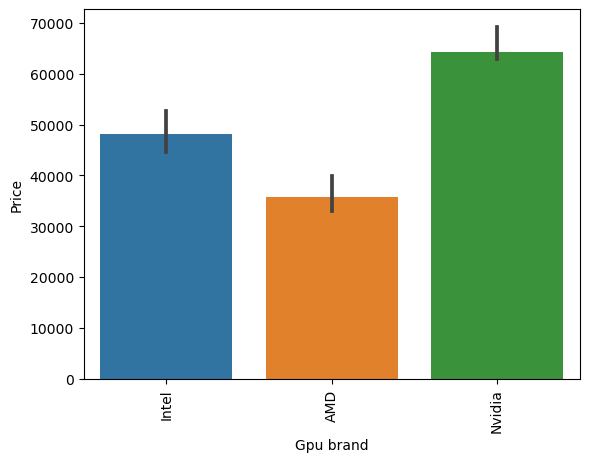

In [216]:
sns.barplot(x=df['Gpu brand'],y=df['Price'],estimator=np.median)
plt.xticks(rotation='vertical')
plt.show()

In [217]:
df.drop(columns=['Gpu'],inplace=True)

In [218]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,3018.873962,Intel Core i5,0,0,Intel
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,1698.116604,Intel Core i5,0,0,Intel
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,2202.907170,Intel Core i5,0,0,Intel
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,3396.233208,Intel Core i7,0,0,AMD
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,3018.873962,Intel Core i5,0,0,Intel


In [219]:
df['OpSys'].value_counts()

OpSys
Windows 10      1047
No OS             63
Linux             61
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            1
Name: count, dtype: int64

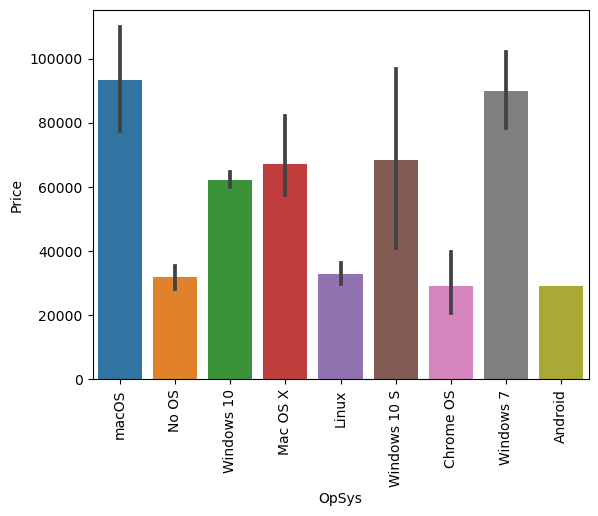

In [220]:
sns.barplot(x=df['OpSys'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [221]:
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [222]:
df['os'] = df['OpSys'].apply(cat_os)

In [223]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,3018.873962,Intel Core i5,0,0,Intel,Mac
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,1698.116604,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,2202.907170,Intel Core i5,0,0,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,3396.233208,Intel Core i7,0,0,AMD,Mac
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,3018.873962,Intel Core i5,0,0,Intel,Mac


In [224]:
df.drop(columns=['OpSys'],inplace=True)

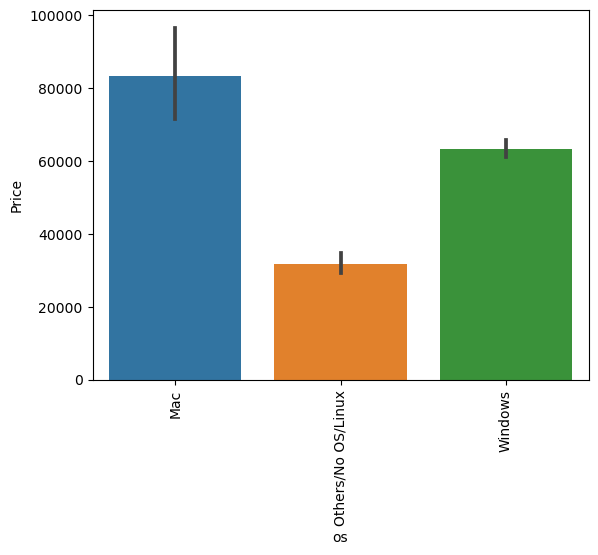

In [225]:
sns.barplot(x=df['os'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

/var/folders/jm/jp15b4nx22l5qmk9kvd1tdhw0000gn/T/ipykernel_15665/1125578356.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Weight'])
/Users/akashtiwari/Documents/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Weight', ylabel='Density'>

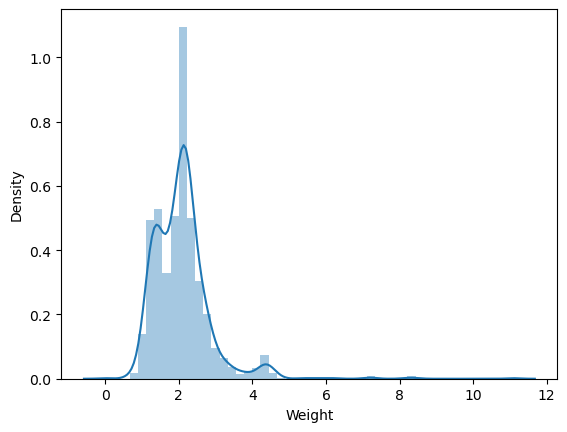

In [226]:
sns.distplot(df['Weight'])

<Axes: xlabel='Weight', ylabel='Price'>

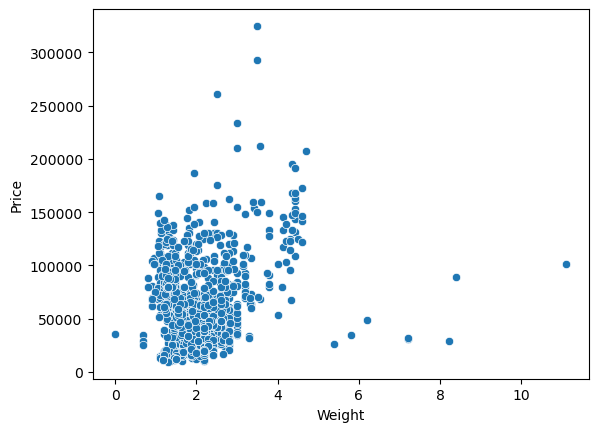

In [227]:
sns.scatterplot(x=df['Weight'],y=df['Price'])

In [228]:
# Convert the 'Price' column to numeric, coercing errors to NaN
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

# Remove rows with NaN values in the 'Price' column
df.dropna(subset=['Price'], inplace=True)

# Calculate the correlation matrix for numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
corr_matrix = df[numeric_columns].corr()

# Get the correlation of 'Price' with other numeric columns
price_corr = corr_matrix['Price']


Columns with non-numeric values:
     Company            TypeName  Ram  Weight              Cpu brand  \
0      Apple           Ultrabook    8    1.37          Intel Core i5   
1      Apple           Ultrabook    8    1.34          Intel Core i5   
2         HP            Notebook    8    1.86          Intel Core i5   
3      Apple           Ultrabook   16    1.83          Intel Core i7   
4      Apple           Ultrabook    8    1.37          Intel Core i5   
...      ...                 ...  ...     ...                    ...   
1298  Lenovo  2 in 1 Convertible    4    1.80          Intel Core i7   
1299  Lenovo  2 in 1 Convertible   16    1.30          Intel Core i7   
1300  Lenovo            Notebook    2    1.50  Other Intel Processor   
1301      HP            Notebook    6    2.19          Intel Core i7   
1302    Asus            Notebook    4    2.20  Other Intel Processor   

     Gpu brand                  os  
0        Intel                 Mac  
1        Intel              

<Axes: >

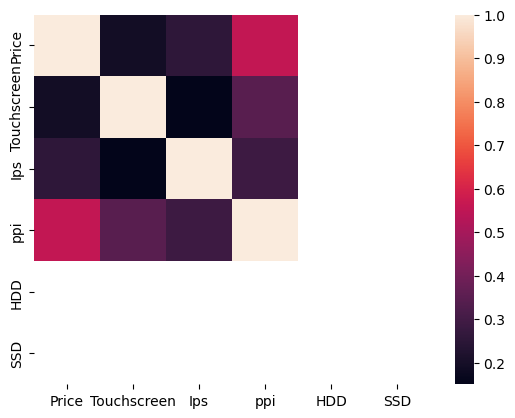

In [229]:
# Convert numeric columns to appropriate types, coercing non-convertible values to NaN
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Identify columns still containing non-numeric values
non_numeric_columns = df.columns[~df.columns.isin(numeric_columns)]

# Print columns with non-numeric values for investigation
print("Columns with non-numeric values:")
print(df[non_numeric_columns])

# Generate the correlation heatmap using only numeric columns
sns.heatmap(df[numeric_columns].corr())


/Users/akashtiwari/Documents/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


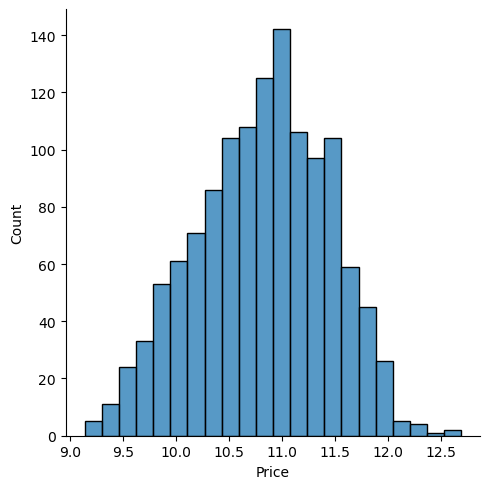

In [230]:
sns.displot(np.log(df['Price']))

In [231]:
X = df.drop(columns=['Price'])
y = np.log(df['Price'])

In [232]:
X

,Company,TypeName,Ram,Weight,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,0,1,3018.873962,Intel Core i5,0,0,Intel,Mac
1,Apple,Ultrabook,8,1.34,0,0,1698.116604,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,0,0,2202.907170,Intel Core i5,0,0,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,0,1,3396.233208,Intel Core i7,0,0,AMD,Mac
4,Apple,Ultrabook,8,1.37,0,1,3018.873962,Intel Core i5,0,0,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,1,1,2202.907170,Intel Core i7,0,0,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,1,1,3671.511950,Intel Core i7,0,0,Intel,Windows
1300,Lenovo,Notebook,2,1.50,0,0,1567.092850,Other Intel Processor,0,0,Intel,Windows
1301,HP,Notebook,6,2.19,0,0,1567.092850,Intel Core i7,0,0,AMD,Windows


In [233]:
y

0       11.175755
1       10.776777
2       10.329931
3       11.814476
4       11.473101
          ...    
1298    10.433899
1299    11.288115
1300     9.409283
1301    10.614129
1302     9.886358
Name: Price, Length: 1272, dtype: float64

In [234]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=2)

In [235]:
X_train

,Company,TypeName,Ram,Weight,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,os
734,Lenovo,Notebook,8,1.44,0,1,2202.90717,Intel Core i5,0,0,Intel,Windows
22,HP,Notebook,4,1.86,0,0,1567.09285,AMD Processor,0,0,AMD,Others/No OS/Linux
810,HP,Gaming,12,3.74,0,1,2202.90717,Intel Core i7,0,0,AMD,Windows
282,Lenovo,Gaming,8,2.50,0,1,2202.90717,Intel Core i5,0,0,Nvidia,Windows
764,Dell,Notebook,4,1.65,0,0,1567.09285,Intel Core i3,0,0,Intel,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...
477,Lenovo,Notebook,8,1.70,0,0,2202.90717,Intel Core i5,0,0,Intel,Windows
308,Lenovo,Notebook,8,2.30,0,0,2202.90717,Intel Core i5,0,0,Nvidia,Windows
505,Lenovo,Notebook,8,1.44,0,0,2202.90717,Intel Core i5,0,0,Intel,Windows
539,Lenovo,Notebook,8,1.87,0,1,2202.90717,Intel Core i7,0,0,Nvidia,Windows


In [236]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

In [237]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [238]:
# Define the ColumnTransformer with modified OneHotEncoder
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(drop='first', handle_unknown='ignore'), [0, 1, 7, 10, 11])
], remainder='passthrough')

# Initialize OneHotEncoder with handle_unknown='ignore'
encoder = OneHotEncoder(handle_unknown='ignore')

### Linear regression

In [239]:
# Define preprocessing steps for numeric and categorical features
numeric_features = X_train.select_dtypes(include=['float64', 'int64']).columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values with mean
    ('scaler', StandardScaler())  # Standardize numeric features
])

categorical_features = X_train.select_dtypes(include=['object']).columns
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with most frequent value
    ('onehot', OneHotEncoder())  # One-hot encode categorical features
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Append linear regression model to preprocessing pipeline
pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('linear_reg', LinearRegression())
])

# Fit the pipeline on the training data
pipe.fit(X_train, y_train)

# Predict on the test data
y_pred = pipe.predict(X_test)

# Evaluate the model
print('R2 score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))

R2 score: 0.7291164876472596
MAE: 0.23149530894367784


### Ridge Regression

In [240]:
# Define columns for numeric and categorical features
numeric_features = X_train.select_dtypes(include=['float64', 'int64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

# Define preprocessing steps for numeric and categorical features
numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values with mean
    ('scaler', StandardScaler())  # Standardize features
])

categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with most frequent value
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical features
])

# Combine preprocessing steps for numeric and categorical features
preprocessor = ColumnTransformer([
    ('numeric', numeric_transformer, numeric_features),
    ('categorical', categorical_transformer, categorical_features)
])

# Define the pipeline with preprocessing and Ridge regression model
pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('ridge', Ridge())  # Ridge regression model
])

# Fit the pipeline on the training data
pipe.fit(X_train, y_train)

# Predict on the test data
y_pred = pipe.predict(X_test)

# Evaluate the model
print('R2 score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))

R2 score: 0.7342568023134581
MAE: 0.2297498681550123


### Lasso Regression

In [241]:

# Define column transformer to handle categorical variables and missing values
categorical_features = [0, 1, 7, 10, 11]
numeric_features = [2, 3, 4, 5, 6, 8, 9]  # Assuming these are the indices of numeric features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numeric_transformer, numeric_features)
    ]
)

# Define the Lasso model
lasso_model = Lasso(alpha=1.0)

# Create the pipeline
pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('lasso', lasso_model)
])

# Fit the pipeline to the training data
pipe.fit(X_train, y_train)

# Predict on the test data
y_pred = pipe.predict(X_test)

# Evaluate the model
print('R2 score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))


R2 score: -0.00026514653186437975
MAE: 0.46691839954558384


### KNN

In [242]:
# Define the ColumnTransformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('col_tnf', OneHotEncoder(sparse=False, drop='first'), [0, 1, 7, 10, 11]),
        ('imputer', SimpleImputer(strategy='mean'), [2, 3, 4, 5, 6, 8, 9])  # Assuming these are numeric features
    ],
    remainder='passthrough'
)

# Define the pipeline
pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', KNeighborsRegressor(n_neighbors=3))
])

# Fit the pipeline on the training data
pipe.fit(X_train, y_train)

# Predict on the test data
y_pred = pipe.predict(X_test)

# Evaluate the model
print('R2 score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))

R2 score: 0.7981241084359851
MAE: 0.19901016499075835


/Users/akashtiwari/Documents/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


### Decision Tree

In [243]:
# Define the ColumnTransformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('col_tnf', OneHotEncoder(sparse=False, drop='first'), [0, 1, 7, 10, 11]),
        ('imputer', SimpleImputer(strategy='mean'), [2, 3, 4, 5, 6, 8, 9])  # Assuming these are numeric features
    ],
    remainder='passthrough'
)

# Define the pipeline
pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(max_depth=8))
])

# Fit the pipeline on the training data
pipe.fit(X_train, y_train)

# Predict on the test data
y_pred = pipe.predict(X_test)

# Evaluate the model
print('R2 score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))

R2 score: 0.762513824286378
MAE: 0.2067294220900388


/Users/akashtiwari/Documents/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


### SVM

In [244]:
# Define the pipeline steps
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse=False, drop='first'), [0, 1, 7, 10, 11])
], remainder='passthrough')

# Add SimpleImputer as a step before SVR
step2 = SVR(kernel='rbf', C=10000, epsilon=0.1)

pipe = Pipeline([
    ('step1', step1),
    ('imputer', SimpleImputer(strategy='mean')),  # Add SimpleImputer here
    ('step2', step2)
])

# Fit the pipeline on the training data
pipe.fit(X_train, y_train)

# Predict on the test data
y_pred = pipe.predict(X_test)

# Evaluate the model
print('R2 score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))

R2 score: 0.522649573101881
MAE: 0.2612031016631241


/Users/akashtiwari/Documents/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


### Random Forest

In [245]:
# Define the pipeline steps
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse=False, drop='first'), [0, 1, 7, 10, 11])
], remainder='passthrough')

# Add SimpleImputer as a step before RandomForestRegressor
step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1', step1),
    ('imputer', SimpleImputer(strategy='mean')),  # Add SimpleImputer here
    ('step2', step2)
])

# Fit the pipeline on the training data
pipe.fit(X_train, y_train)

# Predict on the test data
y_pred = pipe.predict(X_test)

# Evaluate the model
print('R2 score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))


/Users/akashtiwari/Documents/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 score: 0.82412898709707
MAE: 0.18128265112331196


### AdaBoost

In [246]:
from sklearn.impute import SimpleImputer

# Define the pipeline steps
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse=False, drop='first'), [0, 1, 7, 10, 11])
], remainder='passthrough')

# Add SimpleImputer as a step before AdaBoostRegressor
step2 = AdaBoostRegressor(n_estimators=15, learning_rate=1.0)

pipe = Pipeline([
    ('step1', step1),
    ('imputer', SimpleImputer(strategy='mean')),  # Add SimpleImputer here
    ('step2', step2)
])

# Fit the pipeline on the training data
pipe.fit(X_train, y_train)

# Predict on the test data
y_pred = pipe.predict(X_test)

# Evaluate the model
print('R2 score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))


R2 score: 0.7515992149849513
MAE: 0.2388855448347909


/Users/akashtiwari/Documents/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


### Gradient Boost

In [247]:
from sklearn.impute import SimpleImputer

# Define the pipeline steps
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse=False, drop='first'), [0, 1, 7, 10, 11])
], remainder='passthrough')

# Add SimpleImputer as a step before GradientBoostingRegressor
step2 = GradientBoostingRegressor(n_estimators=500)

pipe = Pipeline([
    ('step1', step1),
    ('imputer', SimpleImputer(strategy='mean')),  # Add SimpleImputer here
    ('step2', step2)
])

# Fit the pipeline on the training data
pipe.fit(X_train, y_train)

# Predict on the test data
y_pred = pipe.predict(X_test)

# Evaluate the model
print('R2 score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))


/Users/akashtiwari/Documents/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 score: 0.8042996085636633
MAE: 0.18414814295504545


### XgBoost

In [248]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = XGBRegressor(n_estimators=45,max_depth=5,learning_rate=0.5)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7886890815259977
MAE 0.19092652729939882


/Users/akashtiwari/Documents/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


### Stacking

In [249]:
from sklearn.impute import SimpleImputer

# Define the imputer transformer with the most frequent strategy
imputer = SimpleImputer(strategy='most_frequent')

# Define the pipeline
pipe = Pipeline([
    ('imputer', imputer),  # Impute missing values
    ('step1', step1),
    ('step2', step2)
])

# Fit the pipeline to the training data
pipe.fit(X_train, y_train)

# Predict on the test data
y_pred = pipe.predict(X_test)

# Evaluate the model
print('R2 score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))


R2 score: 0.7877816253979658
MAE: 0.19143332281309117


/Users/akashtiwari/Documents/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


EXPORTING THE MODEL

In [250]:
import pickle
pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))